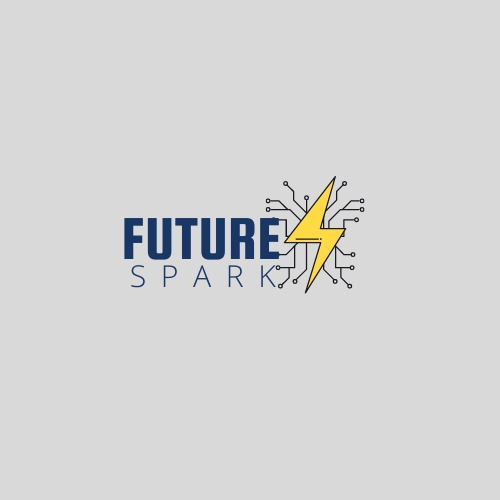

In [6]:
cd project/

/Users/etharalmahmoud/Downloads/SDA bootcamp/python/project


#  <a name=Appendix>Appendix:</a>

- Click on the links:
>1. <a href=#imports>Imports</a>
>1. <a href=#Load>Load Data</a>
>1. <a href=#Cleaning>Data Cleaning</a>
>1. <a href=#pro>Preprocessing </a>
>1. <a href=#fea>Feature Extraction</a> 
>1. <a href=#Rec>Recommendation system</a> 
>1. <a href=#tsf>Tickets and Seats Function</a>
>1. <a href=#off>Ordering Food Function</a>
>1. <a href=#Rf>Rating Function</a>

# <a name='imports'>Libraries Imports</a> 

In [7]:
import pandas as pd
import numpy as np
import re 
import nltk
pd.set_option('display.max_columns', None) # to show all of the columns
from sklearn.feature_extraction.text import TfidfVectorizer
import time
from infos import infos
from film_selector import FilmSelector
from seat_booking import SeatBooking
import matplotlib.pyplot as plt
%matplotlib inline

 #### <a href='#Appendix'>Return to Appendix </a> 

_______________________


# <a name='Load'>Load Data </a> 

In [4]:
#uploading dataset
dataset = pd.read_csv("dataset.csv")
movies = dataset
movies.head()

,Unnamed: 0,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Ratings.Source,Ratings.Value,Metascore,imdbRating,imdbVotes,imdbID,Type,tomatoMeter,tomatoImage,tomatoRating,tomatoReviews,tomatoFresh,tomatoRotten,tomatoConsensus,tomatoUserMeter,tomatoUserRating,tomatoUserReviews,tomatoURL,DVD,BoxOffice,Production,Website,Response
0,1,Hugo,2011,PG,23-Nov-11,126 min,"Adventure, Drama, Family",Martin Scorsese,"John Logan (screenplay), Brian Selznick (book)","Ben Kingsley, Sacha Baron Cohen, Asa Butterfie...","In Paris in 1931, an orphan named Hugo Cabret ...",English,USA,Won 5 Oscars. Another 57 wins & 185 nominations.,https://images-na.ssl-images-amazon.com/images...,Internet Movie Database,7.5/10,83.0,7.5,"260,429",tt0970179,movie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/hugo/,28-Feb-12,"$73,820,094",Paramount Studios,http://www.hugomovie.com/,True
1,2,Hugo,2011,PG,23-Nov-11,126 min,"Adventure, Drama, Family",Martin Scorsese,"John Logan (screenplay), Brian Selznick (book)","Ben Kingsley, Sacha Baron Cohen, Asa Butterfie...","In Paris in 1931, an orphan named Hugo Cabret ...",English,USA,Won 5 Oscars. Another 57 wins & 185 nominations.,https://images-na.ssl-images-amazon.com/images...,Internet Movie Database,7.5/10,83.0,7.5,"260,429",tt0970179,movie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/hugo/,28-Feb-12,"$73,820,094",Paramount Studios,http://www.hugomovie.com/,True
2,3,Jupiter Ascending,2015,PG-13,06-Feb-15,127 min,"Action, Adventure, Sci-Fi","Lana Wachowski, Lilly Wachowski","Lilly Wachowski, Lana Wachowski","Mila Kunis, Channing Tatum, Sean Bean, Eddie R...",A young woman discovers her destiny as an heir...,"English, Russian","USA, Australia",4 wins & 16 nominations.,https://images-na.ssl-images-amazon.com/images...,Internet Movie Database,5.3/10,40.0,5.3,"151,069",tt1617661,movie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/jupiter_ascend...,02-Jun-15,"$43,733,037",Warner Bros. Pictures,http://www.jupiterascending.com/,True
3,4,X-Men: Apocalypse,2016,PG-13,27-May-16,144 min,"Action, Adventure, Sci-Fi",Bryan Singer,"Simon Kinberg (screenplay), Bryan Singer (stor...","James McAvoy, Michael Fassbender, Jennifer Law...",After the re-emergence of the world's first mu...,"English, Polish, German, Arabic, Egyptian (Anc...",USA,13 nominations.,https://images-na.ssl-images-amazon.com/images...,Internet Movie Database,7.1/10,52.0,7.1,"285,476",tt3385516,movie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/x_men_apocalypse/,04-Oct-16,"$135,729,385",20th Century Fox,https://www.facebook.com/xmenmovies,True
4,5,Edge Of Tomorrow,2014,PG-13,06-Jun-14,113 min,"Action, Adventure, Sci-Fi",Doug Liman,"Christopher McQuarrie (screenplay), Jez Butter...","Tom Cruise, Emily Blunt, Brendan Gleeson, Bill...",A soldier fighting aliens gets to relive the s...,English,"USA, Canada",11 wins & 36 nominations.,https://images-na.ssl-images-amazon.com/images...,Internet Movie Database,7.9/10,71.0,7.9,"475,969",tt1631867,movie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/live_die_repea...,07-Oct-14,"$77,121,429",Warner Bros. Pictures,http://www.edgeoftomorrowmovie.com,True


 #### <a href='#Appendix'>Return to Appendix </a> 

_______________________


# <a name='Cleaning'>Data Cleaning </a>

In [5]:
#drop duplicates
movies_df = movies.drop_duplicates(['Title'],keep='last')
movies_df=movies_df.reset_index(drop=True)

In [6]:
#rename plot column to summary
movies_df.rename(columns={'Plot': 'Summary'}, inplace=True)

 #### <a href='#Appendix'>Return to Appendix </a> 

_______________________


# <a name='pro'>Preprocessing  </a>

In [7]:
#summary column
movies_df['Clean_summary'] = movies_df['Summary'].str.lower() #converting them to string and lower case
movies_df['Clean_summary'] = movies_df['Summary'].apply(lambda x: re.sub('[^a-zA-Z]+', ' ', str(x))) #remove punc and numbers

In [8]:
#tokenize 
movies_df['Clean_summary'] = movies_df['Clean_summary'].apply(lambda x: nltk.word_tokenize(x)) #to analyze each word alone 


#remove stopwords
stop_words = nltk.corpus.stopwords.words('english')
words = []
for sentence in movies_df['Clean_summary']:
    lis_words = []
    for word in sentence:
        if word not in stop_words and len(word) >= 3:
            lis_words.append(word)
    words.append(lis_words)
    
movies_df['Clean_summary'] = words

In [9]:
#split each actor's name and each genre
movies_df['Genre'] = movies_df['Genre'].apply(lambda x: str(x).split(','))
movies_df['Actors'] = movies_df['Actors'].apply(lambda x: str(x).split(',')[:4])

In [10]:
#function to clean and lower case the actors and genre's columns
def clean(sentence):
    words = []
    for word in sentence:
        words.append(word.lower().strip())
    return words


movies_df['Genre'] = [clean(word) for word in movies_df['Genre']]
movies_df['Actors'] = [clean(word) for word in movies_df['Actors']]

In [11]:
#adding summary, genre and actors columns together as list
columns = ['Clean_summary', 'Genre', 'Actors']

lis=[]
for i in range(len(movies_df)):
    words = ''
    for column in columns:
        words += ' '.join(movies_df[column][i])+' '
    lis.append(words)

movies_df['Summary'] = lis

In [12]:
#creating a new dataframe
rec_df = movies_df[['Title', 'Summary', 'Year']]
rec_df.head()

,Title,Summary,Year
0,Hugo,Paris orphan named Hugo Cabret lives walls tra...,2011
1,Jupiter Ascending,young woman discovers destiny heiress intergal...,2015
2,X-Men: Apocalypse,After emergence world first mutant world destr...,2016
3,Edge Of Tomorrow,soldier fighting aliens gets relive day day re...,2014
4,The Jungle Book,After threat tiger Shere Khan forces flee jung...,2016


 #### <a href='#Appendix'>Return to Appendix </a> 

_______________________


# <a name='fea'>Feature Extraction  </a>

In [13]:
#TfidfVectorizer --> number of times a word appears in the document 
TFIDF = TfidfVectorizer()
#fit_transform --> scale the training data and also learn the scaling parameters
features = TFIDF.fit_transform(rec_df['Summary'])
features.shape

(4798, 20926)

In [14]:
#calculating the similarity between the words
from sklearn.metrics.pairwise import cosine_similarity

similarity = cosine_similarity(features, features)


 #### <a href='#Appendix'>Return to Appendix </a> 

_______________________


# <a name='Rec'>Recommendation system</a> 

In [15]:
def recommend_movie(title):
    movies = []
    index = rec_df[rec_df['Title']==title].index[0]
    score = pd.Series(similarity[index]).sort_values(ascending=False)
    top5 = list(score.iloc[1:6].index)
    
    for i in top5:
        if rec_df['Year'][i] >= 2020:
            movies.append(rec_df['Title'][i])
    return movies

In [50]:
 recommend_movie(input("Please enter a movie:").title())

 #### <a href='#Appendix'>Return to Appendix </a> 

_______________________


# <a name='tsf'>Tickets and Seats Function</a> 

In [37]:
ticket_cost_adult= 70
ticket_cost_kid = 40

class Controller:
    def __init__(self, infos):
        self.films = infos  
        self.welcome()
        self.choose_film()
        if self.choice != 'x':
            self.choose_seat()
            self.tickets()
        self.bye()
         
  # The choose_film function give us a list of movies
    def choose_film(self):
        #assign the FilmSelector class to selector
            selector = FilmSelector()
            selector.display_options(self.films)
            self.choice = selector.get_choice(self.films)

      #choose_seat function to choose row and column 
    def choose_seat(self):
            #all the variable we need 
            film = self.films[int(self.choice) - 1]
            name = film['name']
            seats_list = film['seats']
            

            #the movie they chose
            print('Your movie is: {}'.format(name))
            time.sleep(0.7)
           #list of ways to book seats
            print('Please choose:')
            time.sleep(0.7)
            print("1- Choose the row and column number for your seats")
            print("2- Book me a front seat :)！")
            time.sleep(0.7)
            print('')

            #choosing the method 
            method = input('Please choose the method you want')
            #choices are 1 or 2
            valid_method = ['1','2']
            #if they chose anything other than 1 or 2
            while method not in valid_method:
                method = input("Invalid input, Please re-enter")

            #assigning seatbooking class to a variable
            booking = SeatBooking()
            #getting all of the booking information 
            booking.check_bookings(seats_list)
            #Method 1:
            if method == '1':
                booking.book_seat(seats_list)
            #Method 2: 
            else:
                 booking.book_seat_at_front(seats_list)
                
           # print(booking(seats_list))
            #ordering =input("You want complete to see your price (yes/no) : ")
            #if(ordering=="yes"):
             #   Controller.tickets(self)
            #else:
             #   pass
            
            
    #this function for buying tickets           
    def tickets(self):
        adult_tickets = 0
        kids_tickets= 0
        PriceAfterDiscount=0
        PriceOld_60=0
        total = 0
        
        ordering =input("You want complete to see your price (yes/no) : ")
        while(ordering == 'yes'):
            adult=int(input("How old are you? "))
            if ((adult > 15) and (adult < 60)):
                adult_tickets +=ticket_cost_adult
                print("Your tickets will be:" , adult_tickets, "SAR")

            elif (adult <= 15):
                kids_tickets+=(ticket_cost_kid)
                print("Your tickets will be:" , kids_tickets, "SAR")

            elif (adult >= 60):
                discount = ((input("We have a 10% discount on Fridays, would you like to book your ticket?")))
                if (discount == "yes"):
                    DiscountAmount =(ticket_cost_adult * 0.10)
                    PriceAfterDiscount+= (ticket_cost_adult - DiscountAmount)
                    print("Your tickets will be:" , PriceAfterDiscount , "SAR")

                else:
                    PriceOld_60+= ticket_cost_adult
                    print("Your tickets will be:" , PriceOld_60, "SAR")

            else:  
                print("invalid number!")
        #print('Your total is:',(total),"SAR")
            print(" ")
        
            ordering =input("you want buy anther tickets : ")
            if(ordering=="yes"):
                Controller.choose_seat(self)
            total_price_tickt=(adult_tickets+kids_tickets+PriceAfterDiscount+PriceOld_60)    
            print('Your Bill is:',total_price_tickt,"SAR")   
      #  Print a welcome message
    def welcome(self):
            print(" Welcome to Khalid's cinema ")
            print('')
            time.sleep(0.7)

      #  Print the conclusion
    def bye(self):
            print('')
            time.sleep(0.7)
            print(" We're exited to see you :)!")

            
    


In [38]:
Controller(infos)

 Welcome to Khalid's cinema 

 Today's movies：
1 - The Informers
2 - The Watch
3 - Lake Placid
4 - The 5th Wave
5 - Moonrise Kingdom
6 - Cruel Intentions
7 - Diary of the Dead
8 - Delgo
x -  sign out 
 Your choice is？2
Your movie is: The Watch
Please choose:
1- Choose the row and column number for your seats
2- Book me a front seat :)！

Please choose the method you want2
 Rows from  1-6  , columns from  1-8 
●  ●  ●  ●  ●  ●  ●  ●
●  ●  ●  ●  ●  ●  ●  ●
●  ●  ●  ●  ○  ○  ○  ○
○  ○  ○  ○  ○  ○  ○  ○
○  ○  ●  ○  ○  ○  ○  ○
○  ○  ○  ○  ○  ○  ○  ○
Your seat number ：row 3 column 5
You want complete to see your price (yes/no) : yes
How old are you? 20
Your tickets will be: 70 SAR
 
you want buy anther tickets : yes
Your movie is: The Watch
Please choose:
1- Choose the row and column number for your seats
2- Book me a front seat :)！

Please choose the method you want2
 Rows from  1-6  , columns from  1-8 
●  ●  ●  ●  ●  ●  ●  ●
●  ●  ●  ●  ●  ●  ●  ●
●  ●  ●  ●  ●  ○  ○  ○
○  ○  ○  ○  ○  ○  ○

 #### <a href='#Appendix'>Return to Appendix </a> 

_______________________


# <a name='off'>Ordering Food Function/a> 

In [21]:
Menu ={
  'popcorn' : 30, 
  'nachos': 35, 
  'soft drinks': 18,
  'chips' : 9,
  'hot dogs' : 22, 
  "water": 5 }

# function for customer order and total cost for a  customer 
def Customer_order_function():
    
    ordering=input("What would you like to order?: (yes/no) ")
        
    total=0
    if(ordering== 'yes'):
        while (ordering == 'yes'):
            # this condition for stop or complete the loop
            if(ordering == 'yes'):
                print(Menu)
                snack=input("What would you like to have?:")

                if(snack in Menu):

                    print(" ")

                    quantity=int(input("How many do you want?: "))
                    if (quantity > 0):
                        print(" ")

                    #if they enter a negative number or 0, this message will be printed 
                    else:
                        print("Invalid number!")
                        break 

                    price = Menu[snack] # to check the price of the snack they choose
                    total+=(price*quantity) # total of the snacks they bought and their quantity


                    ordering=(input("Would you like to order another item? (yes/no): "))

                    print('Your total is:', total,'SAR')

                else:
                    print("Sorry! we don't have what you want")

            elif(ordering == 'no'):
                break

            else:
                print("Wrong choice try again! ")
                break   

    elif(ordering == 'no'): 
        print(" ")
        print("We hope to see you again :) ")
        

    else:
        print("Wrong choice try again! ")
        customer_order_function()



In [22]:
 Customer_order_function()

What would you like to order?: (yes/no) yes
{'popcorn': 30, 'nachos': 35, 'soft drinks': 18, 'chips': 9, 'hot dogs': 22, 'water': 5}
What would you like to have?:water
 
How many do you want?: 2
 
Would you like to order another item? (yes/no): yes
Your total is: 10 SAR
{'popcorn': 30, 'nachos': 35, 'soft drinks': 18, 'chips': 9, 'hot dogs': 22, 'water': 5}
What would you like to have?:popcorn
 
How many do you want?: 1
 
Would you like to order another item? (yes/no): no
Your total is: 40 SAR


 #### <a href='#Appendix'>Return to Appendix </a> 

_______________________


# <a name='Rf'>Rating Function</a> 

In [27]:
def rating ():
    recommendation_system_rate = {1:0 , 2:0 , 3:0 , 4:0 , 5:0} # creating dictionary
    recommendation_system_note = {1:"" , 2:"" , 3:"" , 4:"" , 5:""} # creating dictionary
    service_rate = {1:0 , 2:0 , 3:0 , 4:0 , 5:0} # creating dictionary 
    service_note = {1:"" , 2:"" , 3:"" , 4:"" , 5:""} # creating dictionary
    print ("we hope you have a good experience with us")
    read_condation = True
    while(read_condation == True):
        value = input("do you want to rate your experience with us:(yes/no)\n")
        if(value == 'no'):
            print("Thank you for visit us and we are waiting you for next visit")
            read_condation = False
            break
        elif(value == 'yes'):
            value_1 = input("What you want to rate 1-recommendation system  2-our service , our expected input will be 1 or 2  \n")
            if(value_1 =='1'):
                value_2 = int(input("Could you rate your experience with recommendation system , our expected input will be (very unsatisfied = 1 , unsatisfied = 2 , neutral = 3, satisfied = 4 , very satisfied = 5):\n"))
                if(value_2 == 1 or value_2 == 2 or value_2 == 3 or value_2 == 4 or value_2 == 5):
                    recommendation_system_rate [value_2] = recommendation_system_rate [value_2] + 1
                    note_1 = input("please write your feedback about our recommendation system : \n")
                    recommendation_system_note [value_2] = recommendation_system_note [value_2]+"-"+note_1
                    
                else:
                    print("unexpected input")
                    
            elif(value_1 == '2'):
                value_3 = int(input("Could you rate your experience with service , our expected input will be (very unsatisfied = 1 , unsatisfied = 2 , neutral = 3, satisfied = 4 , very satisfied = 5):\n"))
                if(value_3 == 1 or value_3 == 2 or value_3 == 3 or value_3 == 4 or value_3 == 5):
                    service_rate [value_3] = service_rate [value_3] + 1
                    note_2 = input("please write your feedback about our service : \n")
                    service_note [value_3] = service_note[value_3]+"-"+note_2        
                else:
                    print("unexpected input")
                    
            else:
                print("unexpected input")
        else:
            print("try again")
            rateing ()
             
    print("The number of customer in each rating for our recommendation system: \n")
    print(recommendation_system_rate)
    print("The feedbacks of each rating for our recommendation system: \n")
    print(recommendation_system_note)
    print("The number of customer in each rating for our service : \n")
    print(service_rate)
    print("The feedbacks of each rating for our service: \n")
    print(service_note)
    
    
    print("visualization of our recommendation system rate \n")
    
    
    # Get the Keys and store them in a list
    labels = list(recommendation_system_rate.keys())

    # Get the Values and store them in a list
    values = list(recommendation_system_rate.values())
    
    print("visualization of our service rate \n")
    
    # Get the Keys and store them in a list
    labels_2 = list(service_rate.keys())

    # Get the Values and store them in a list
    values_2 = list(service_rate.values())
                
    plt.figure(figsize=[15,5])

    plt.suptitle('Khalid Cinema',fontsize = 20)

    plt.subplot(1,2,1) # (number of rows, number of columns, number of plot)
    plt.bar(range(len(recommendation_system_rate)), values, tick_label=labels)
    plt.title('Bar Chart Recommendation  ')

    plt.subplot(1,2,2)
    plt.bar(range(len(service_rate)), values_2, tick_label=labels_2)
    plt.title('Bar Chart Service ');  

we hope you have a good experience with us
do you want to rate your experience with us:(yes/no)
yes
What you want to rate 1-recommendation system  2-our service , our expected input will be 1 or 2  
1
Could you rate your experience with recommendation system , our expected input will be (very unsatisfied = 1 , unsatisfied = 2 , neutral = 3, satisfied = 4 , very satisfied = 5):
4
please write your feedback about our recommendation system : 
nothing
do you want to rate your experience with us:(yes/no)
yes
What you want to rate 1-recommendation system  2-our service , our expected input will be 1 or 2  
2
Could you rate your experience with service , our expected input will be (very unsatisfied = 1 , unsatisfied = 2 , neutral = 3, satisfied = 4 , very satisfied = 5):
4
please write your feedback about our service : 
nothing
do you want to rate your experience with us:(yes/no)
no
Thank you for visit us and we are waiting you for next visit
The number of customer in each rating for our reco

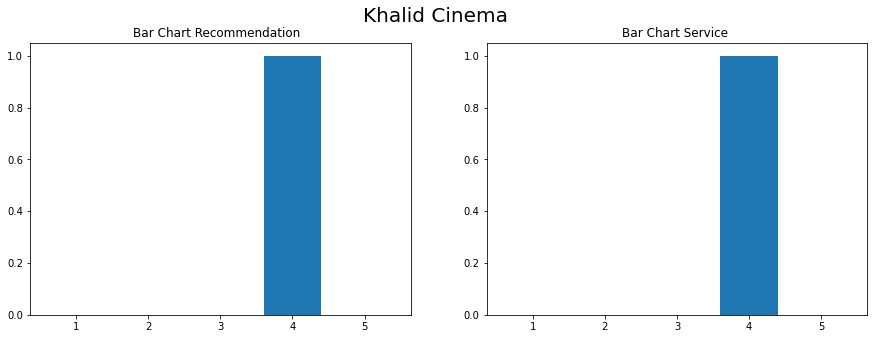

In [28]:
rating()

 #### <a href='#Appendix'>Return to Appendix </a> 

_______________________
